<a href="https://www.kaggle.com/code/shiviyadav/movie-ratings-analysis?scriptVersionId=103414028" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movieratings-20072011/Movie-Ratings.csv


In [2]:
df = pd.read_csv('/kaggle/input/movieratings-20072011/Movie-Ratings.csv')

In [3]:
df

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [4]:
len(df)

559

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [6]:
df.shape

(559, 6)

In [7]:
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
df.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [9]:
df.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [10]:
df.columns = ['Film', 'Genre', 'CriticsRatings', 'AudienceRatings','Budgetmillions', 'Year']

In [11]:
df.head()

,Film,Genre,CriticsRatings,AudienceRatings,Budgetmillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   CriticsRatings   559 non-null    int64 
 3   AudienceRatings  559 non-null    int64 
 4   Budgetmillions   559 non-null    int64 
 5   Year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [13]:
df.describe()

,CriticsRatings,AudienceRatings,Budgetmillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [14]:
df.Film=df.Film.astype('category')

In [15]:
df.Genre=df.Genre.astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   CriticsRatings   559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   Budgetmillions   559 non-null    int64   
 5   Year             559 non-null    int64   
dtypes: category(2), int64(4)
memory usage: 40.1 KB


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

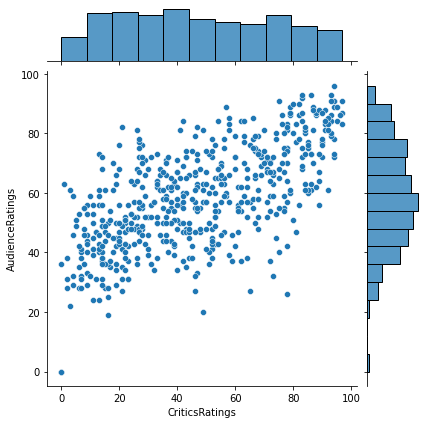

In [18]:
j=sns.jointplot(data=df,x='CriticsRatings',y='AudienceRatings')

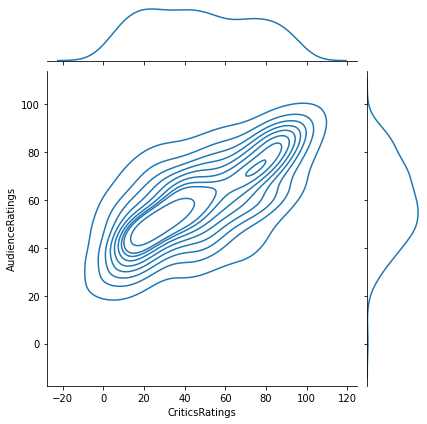

In [19]:
j=sns.jointplot(data=df,x='CriticsRatings',y='AudienceRatings',kind='kde')

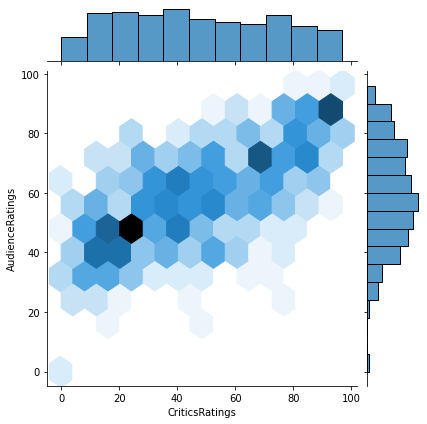

In [20]:
j=sns.jointplot(data=df,x='CriticsRatings',y='AudienceRatings',kind='hex')

In [21]:
import warnings
warnings.filterwarnings('ignore')

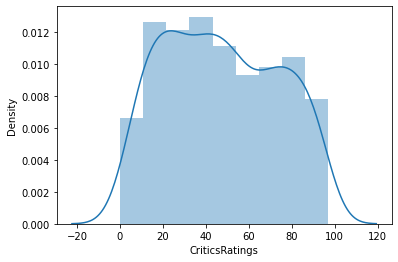

In [22]:
d=sns.distplot(df.CriticsRatings)

<AxesSubplot:xlabel='AudienceRatings', ylabel='Density'>

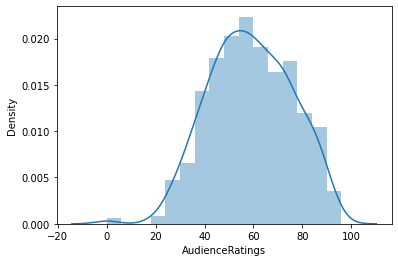

In [23]:
sns.distplot(df.AudienceRatings)

In [24]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='AudienceRatings', ylabel='Density'>

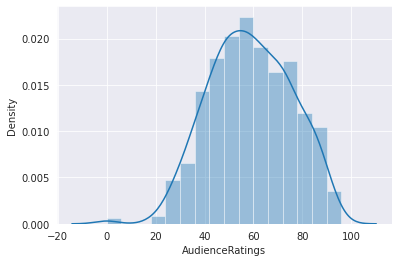

In [25]:
sns.distplot(df.AudienceRatings)

In [26]:
sns.set_style('white')

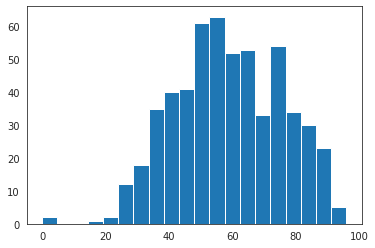

In [27]:
H=plt.hist(df.AudienceRatings,bins=20)

In [28]:
sns.set_style('darkgrid')

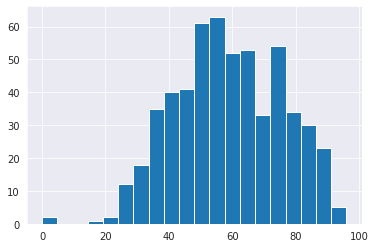

In [29]:
H1=plt.hist(df.AudienceRatings,bins=20)

In [30]:
df.head()

,Film,Genre,CriticsRatings,AudienceRatings,Budgetmillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


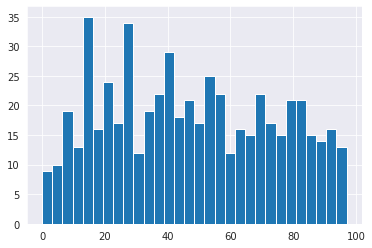

In [31]:
H2 = plt.hist(df.CriticsRatings,bins =30)

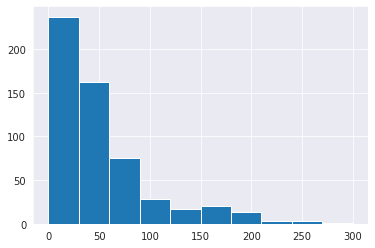

In [32]:
H3 = plt.hist(df.Budgetmillions)

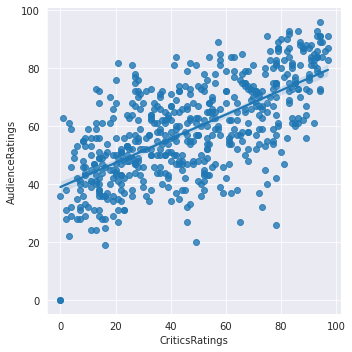

In [33]:
L = sns.lmplot(data = df, x='CriticsRatings', y='AudienceRatings', )

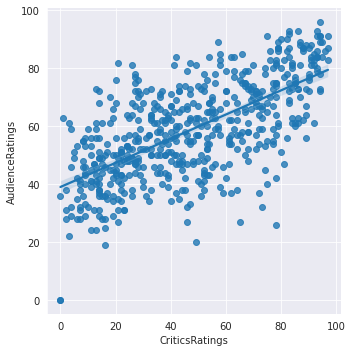

In [34]:
L = sns.lmplot(data = df, x='CriticsRatings', y='AudienceRatings', fit_reg ='True')

In [35]:
df.head()

,Film,Genre,CriticsRatings,AudienceRatings,Budgetmillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


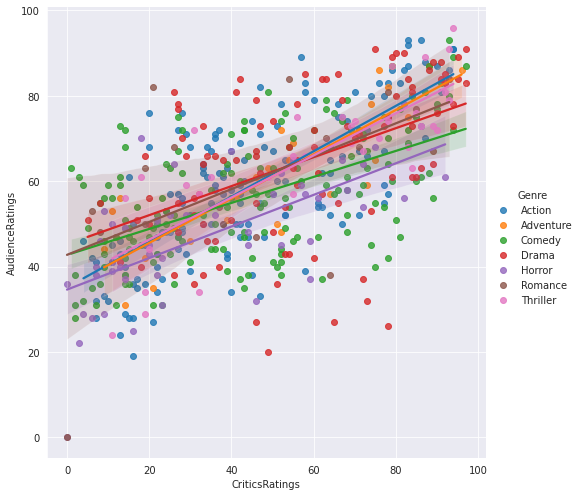

In [36]:
L = sns.lmplot(data = df, x='CriticsRatings', y='AudienceRatings', fit_reg ='True', hue = 'Genre' ,size = 7)

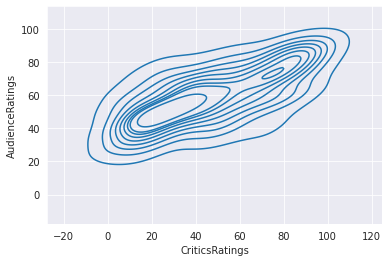

In [37]:
k = sns.kdeplot(data = df , x = 'CriticsRatings', y='AudienceRatings')

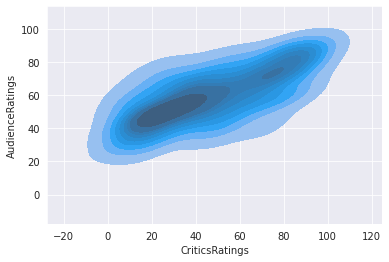

In [38]:
k = sns.kdeplot(data = df , x = 'CriticsRatings', y='AudienceRatings', shade = True)

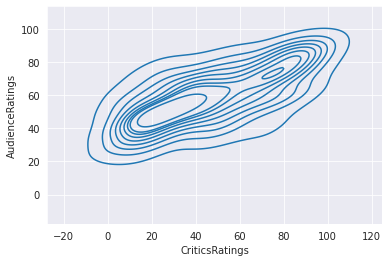

In [39]:
k = sns.kdeplot(data = df , x = 'CriticsRatings', y='AudienceRatings', shade =False)

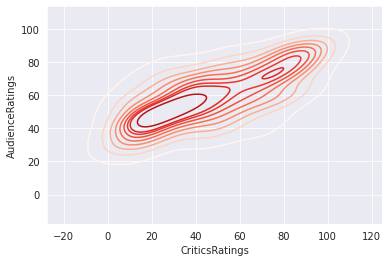

In [40]:
k = sns.kdeplot(data = df , x = 'CriticsRatings', y='AudienceRatings',shade =False,cmap ='Reds')

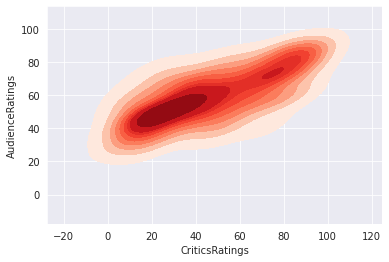

In [41]:
k = sns.kdeplot(data = df , x = 'CriticsRatings', y='AudienceRatings',shade =True,cmap ='Reds')

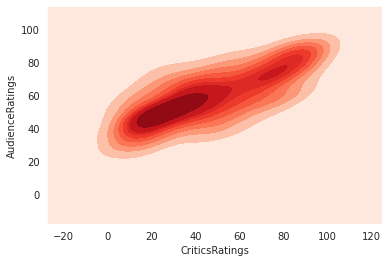

In [42]:
k = sns.kdeplot(data = df , x = 'CriticsRatings', y='AudienceRatings',shade =True,shade_lowest=True ,cmap ='Reds')

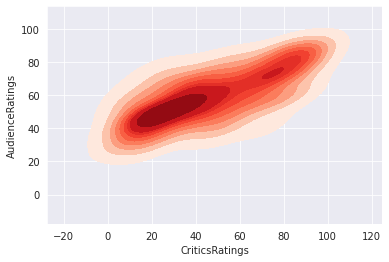

In [43]:
k = sns.kdeplot(data = df , x = 'CriticsRatings', y='AudienceRatings',shade =True,shade_lowest=False ,cmap ='Reds')

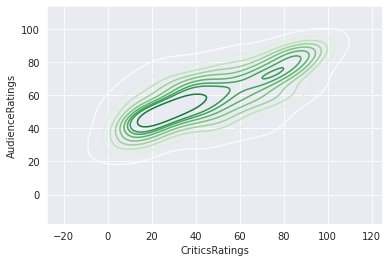

In [44]:
k = sns.kdeplot(data = df , x = 'CriticsRatings', y='AudienceRatings',shade =False,shade_lowest=False ,cmap ='Greens')

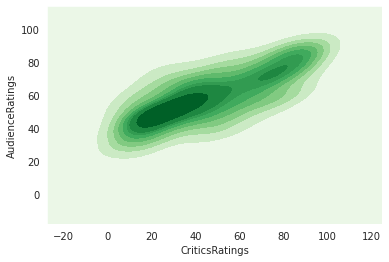

In [45]:
Tk = sns.kdeplot(data = df , x = 'CriticsRatings', y='AudienceRatings',shade =True,shade_lowest=True ,cmap ='Greens')

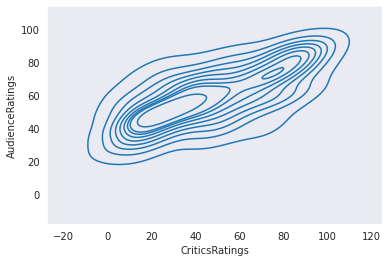

In [46]:
sns.set_style('dark')
k = sns.kdeplot(df.CriticsRatings, df.AudienceRatings)

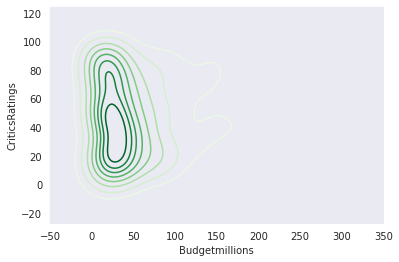

In [47]:
sns.set_style('dark')
k1 = sns.kdeplot(df.Budgetmillions,df.CriticsRatings,shade_lowest = True, cmap = 'Greens')

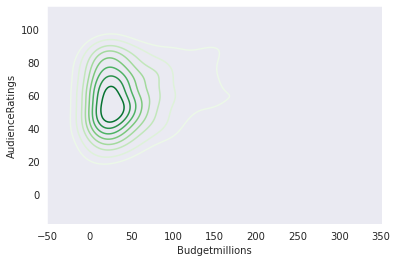

In [48]:
k2 = sns.kdeplot(df.Budgetmillions,df.AudienceRatings,shade_lowest = True, cmap = 'Greens')

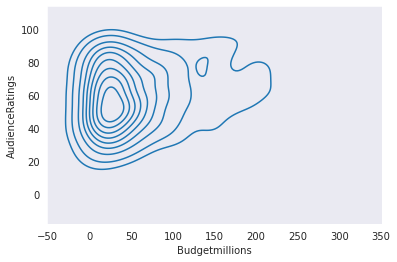

In [49]:
k1 = sns.kdeplot(df.Budgetmillions,df.AudienceRatings)

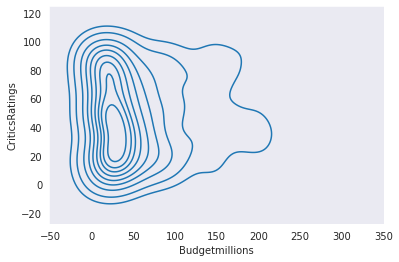

In [50]:
k2 = sns.kdeplot(df.Budgetmillions,df.CriticsRatings)

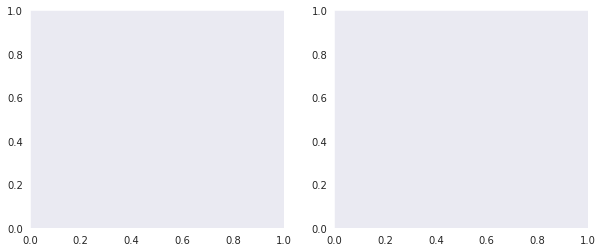

In [51]:
f,ax = plt.subplots(1,2, figsize = (10,4))

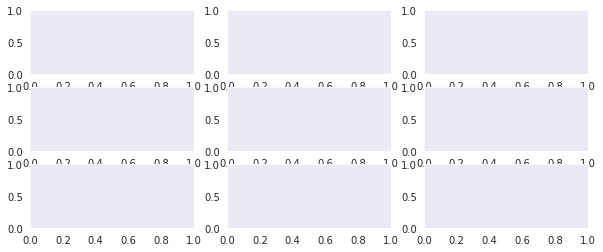

In [52]:
f,ax = plt.subplots(3,3, figsize =(10,4))

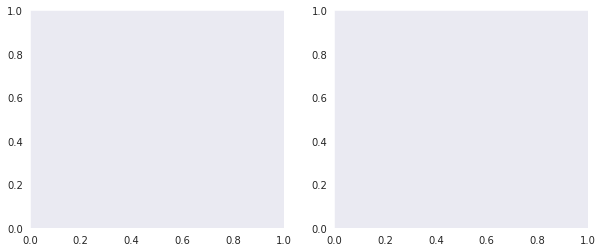

In [53]:
f,axes = plt.subplots(1,2, figsize = (10,4))

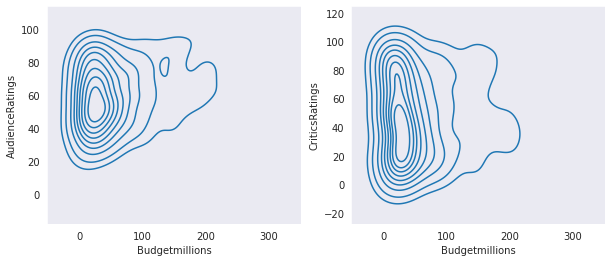

In [54]:
f,axes = plt.subplots(1,2, figsize = (10,4))

k1 = sns.kdeplot(df.Budgetmillions,df.AudienceRatings, ax = axes[0])
k2 = sns.kdeplot(df.Budgetmillions,df.CriticsRatings, ax = axes[1])

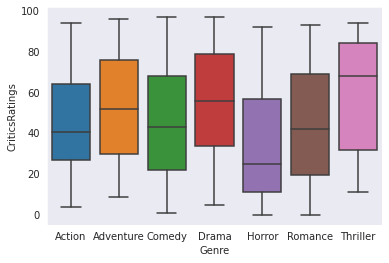

In [55]:
B = sns.boxplot(data = df, x = 'Genre', y = 'CriticsRatings')

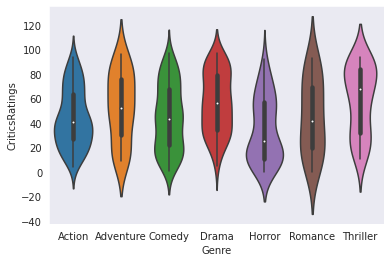

In [56]:
V = sns.violinplot(data = df, x = 'Genre', y = 'CriticsRatings')

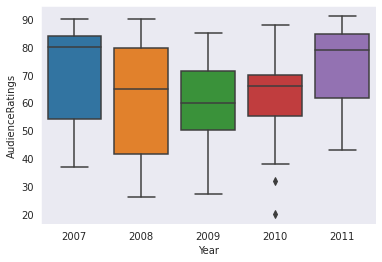

In [57]:
B = sns.boxplot(data=df[df.Genre=='Drama'],x= 'Year', y = 'AudienceRatings')

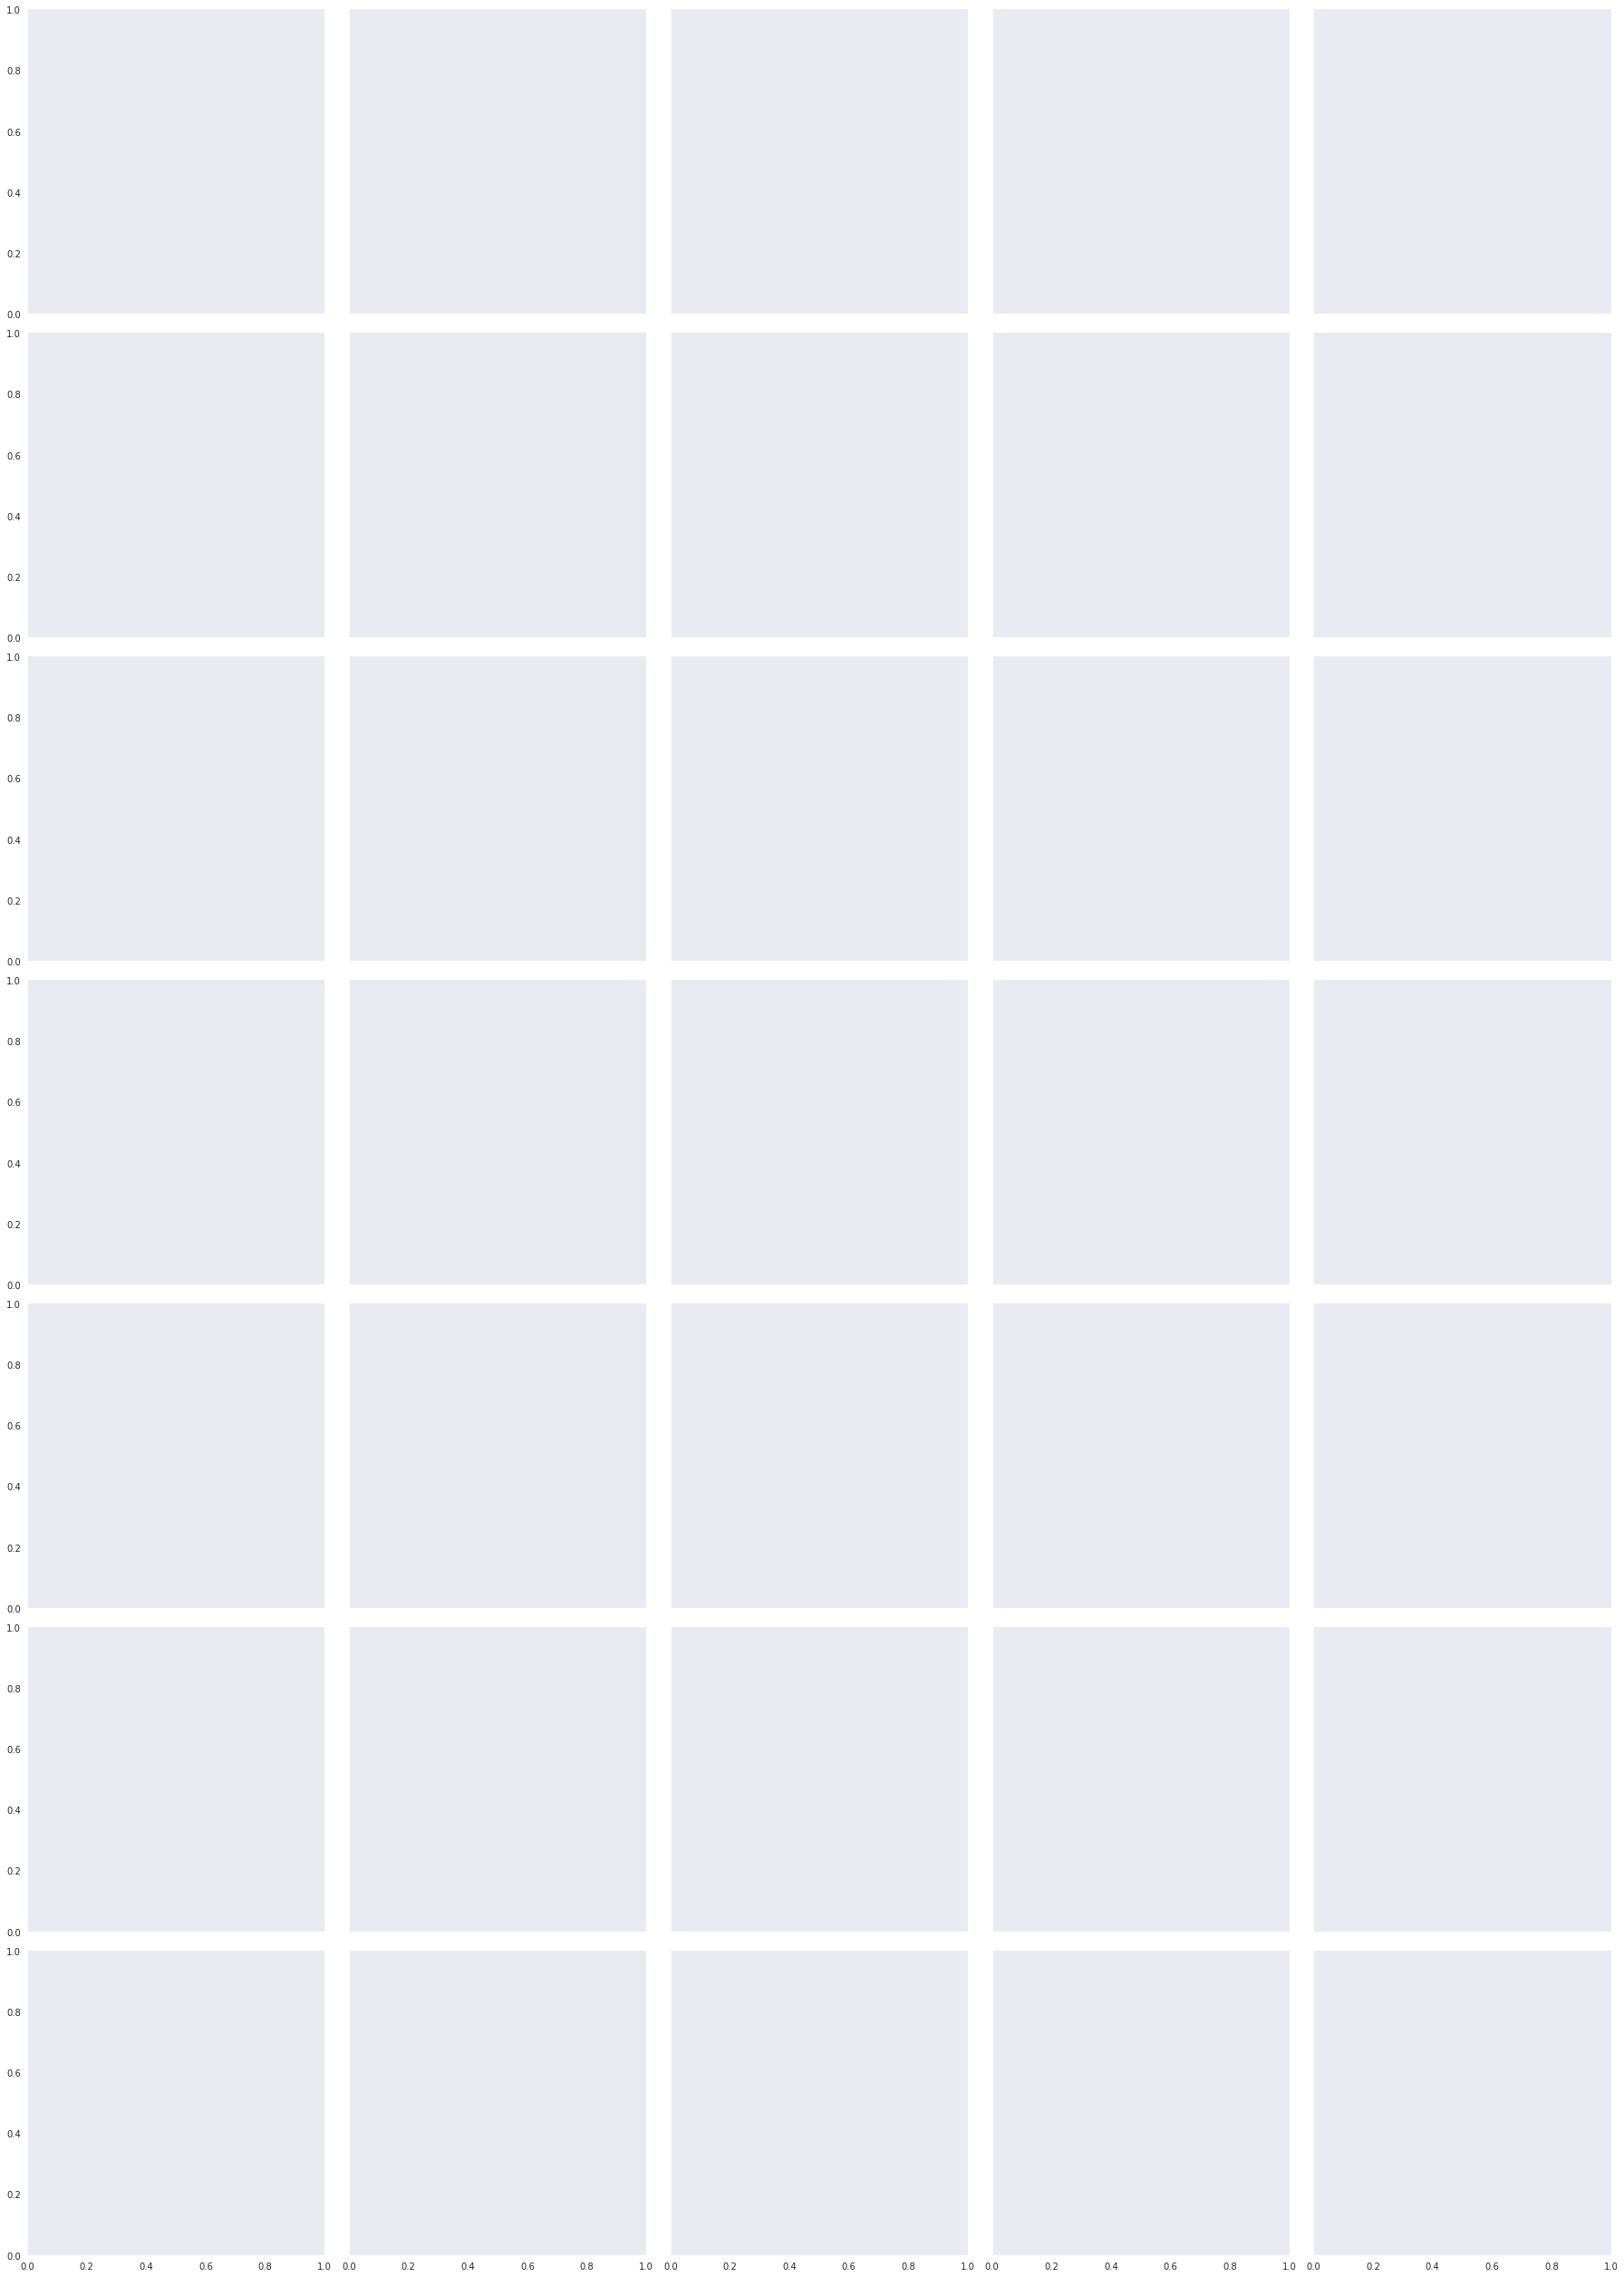

In [58]:
F = sns.FacetGrid(df, row = 'Genre', col = 'Year', hue = 'Genre',size = 5)

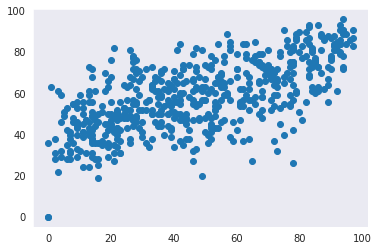

In [59]:
plt.scatter(df.CriticsRatings,df.AudienceRatings)

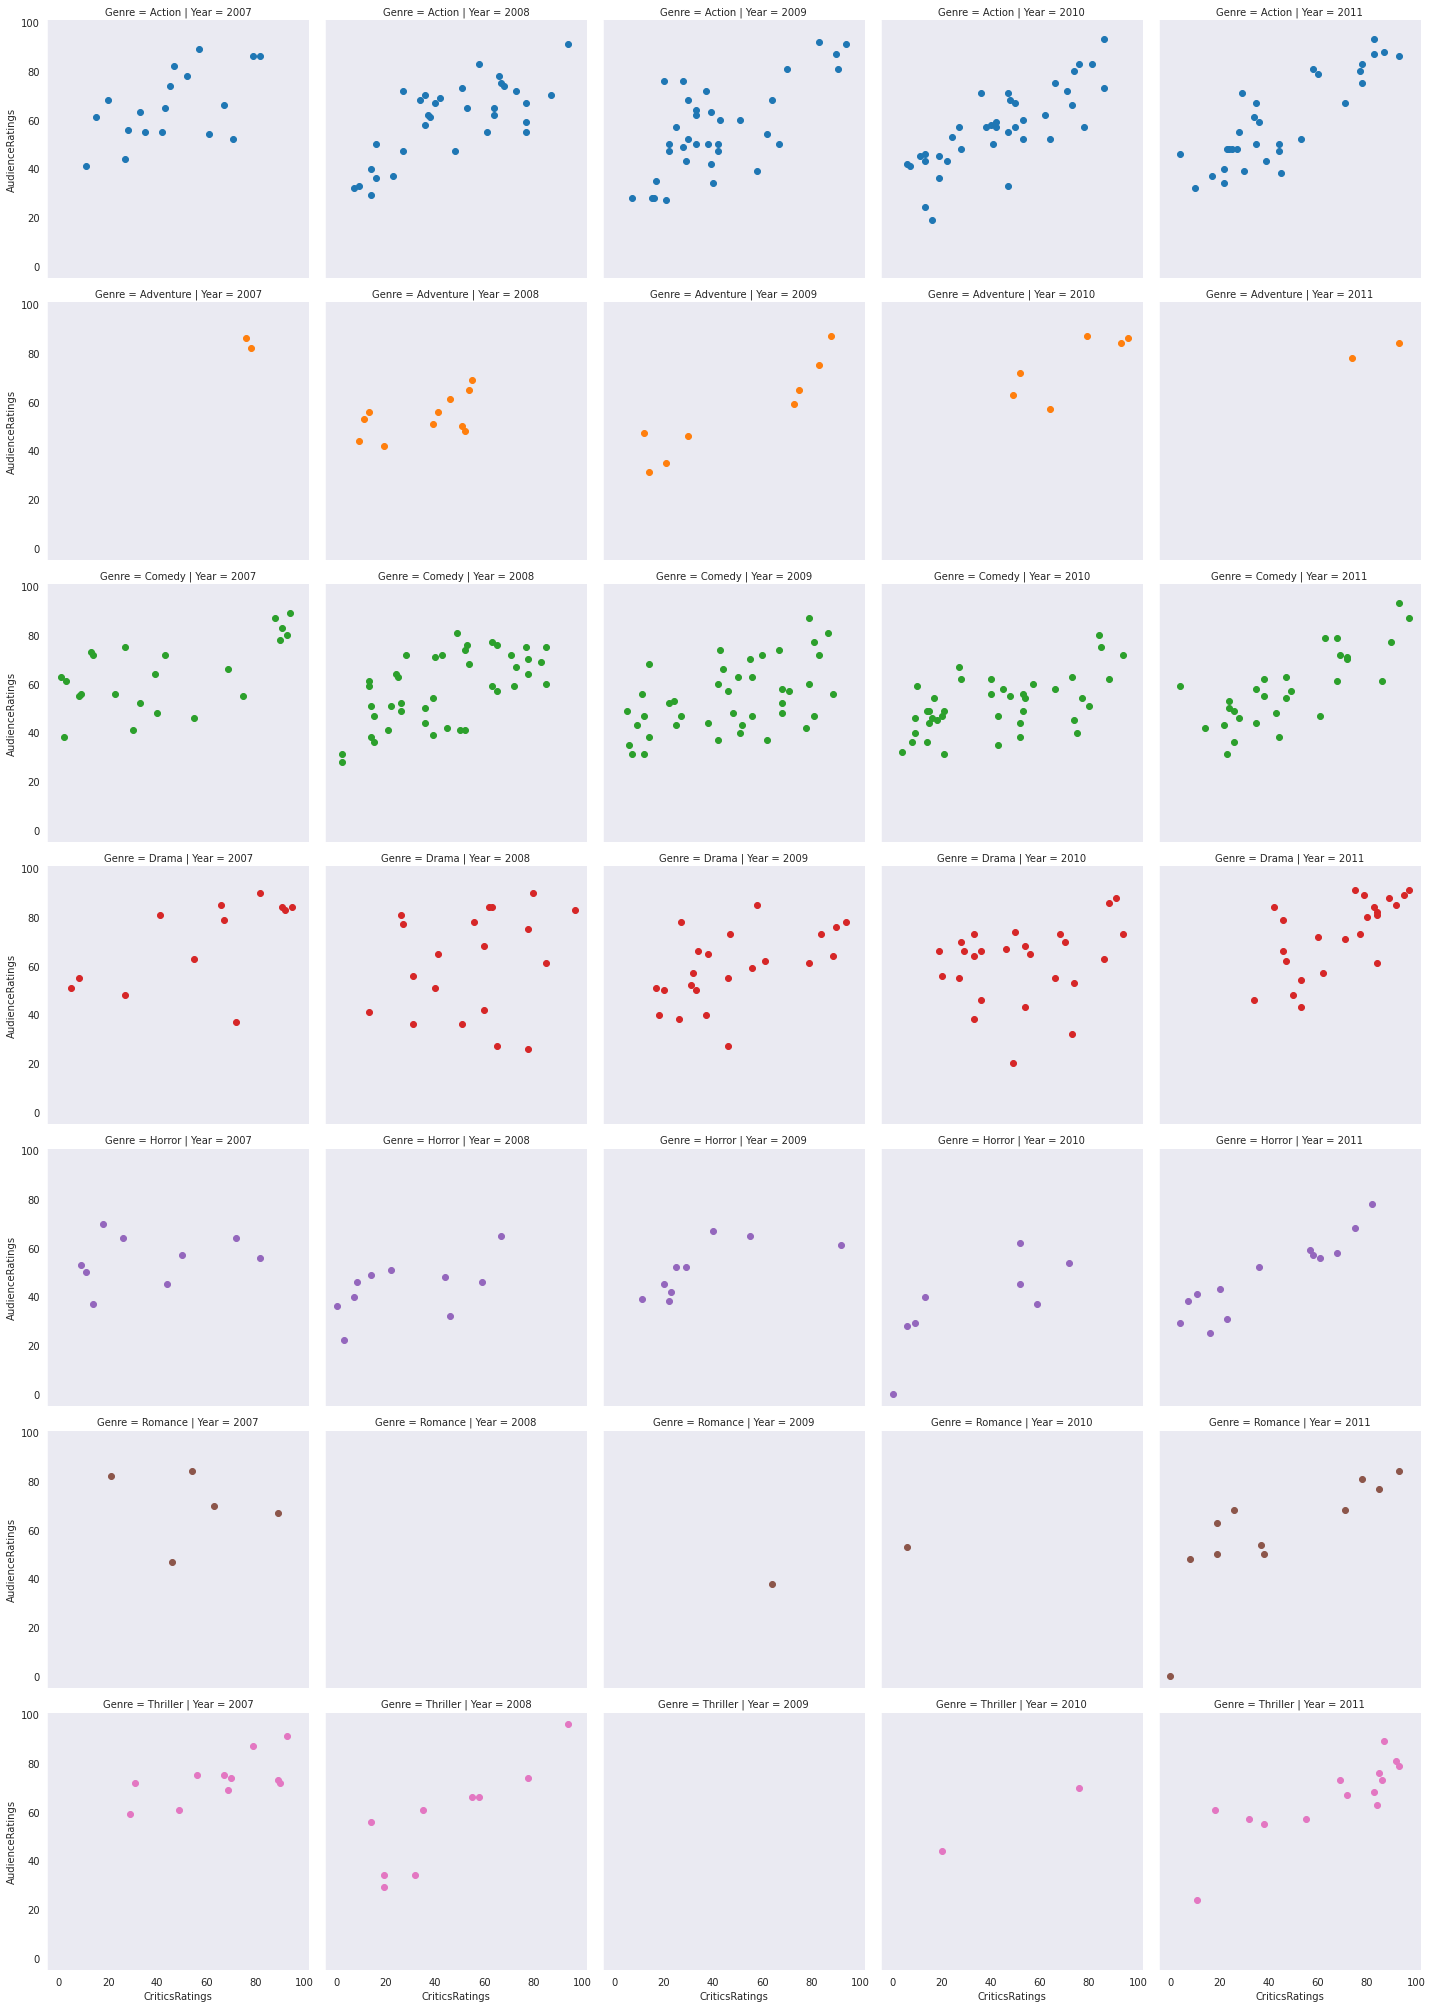

In [60]:
F = sns.FacetGrid(df, row = 'Genre', col = 'Year' , hue = 'Genre',size =4)
F1 = F.map(plt.scatter,'CriticsRatings','AudienceRatings')

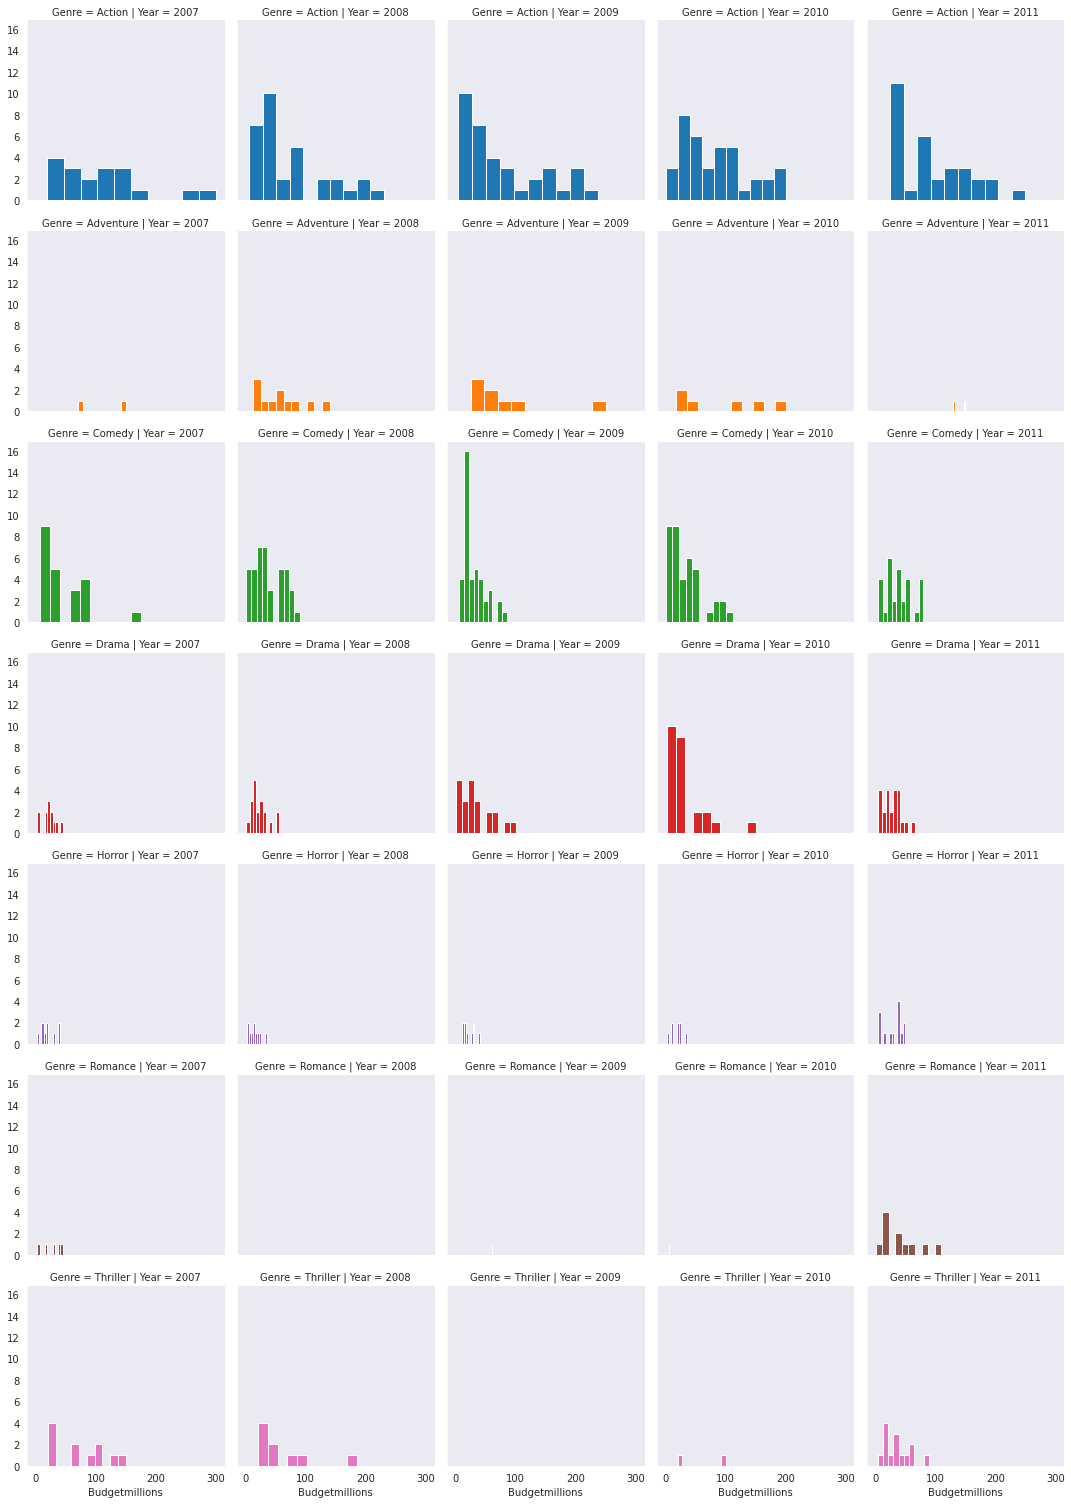

In [61]:
F = sns.FacetGrid(df, row = 'Genre' , col = 'Year' , hue ='Genre')
F = F.map(plt.hist,'Budgetmillions')


<function matplotlib.pyplot.show(close=None, block=None)>

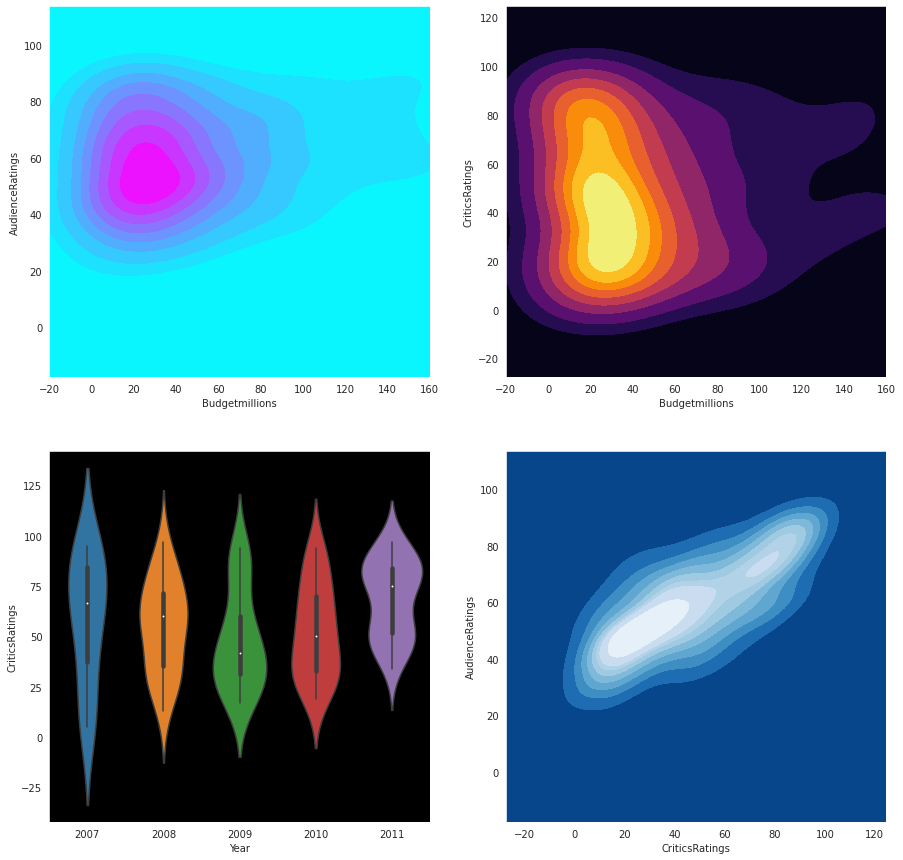

In [62]:
sns.set_style('dark',{'axes.facecolor':'black'})
f, axes = plt.subplots(2,2 , figsize = (15,15))

k1 = sns.kdeplot(df.Budgetmillions,df.AudienceRatings,shade = True,shade_lowest = True, cmap = 'cool' ,ax =axes[0,0])
k2 = sns.kdeplot(df.Budgetmillions,df.CriticsRatings,shade = True ,shade_lowest = True, cmap = 'inferno', ax =axes[0,1])

V = sns.violinplot(data = df[df.Genre=='Drama'],x= 'Year',y = 'CriticsRatings', ax = axes[1,0])
Z = sns.kdeplot(df.CriticsRatings,df.AudienceRatings,shade = True, shade_lowest = True, cmap = 'Blues_r',ax =axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))


plt.show